In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('dark_background')
#sns.set_theme(style="whitegrid")
# import specific components from scikit-learn
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# enhanced stats functions
#from scipy import stats

In [2]:
print(f"pandas version  : {pd.__version__}")  # 1.4.3
print(f"numpy version   : {np.__version__}")  # 1.23.1
print(f"seaborn version : {sns.__version__}") # 0.11.2

pandas version  : 1.4.3
numpy version   : 1.21.6
seaborn version : 0.11.2


In [3]:
# read in data
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape[0]

20640

## Look at the median_house_value variable. Does it have a long tail?

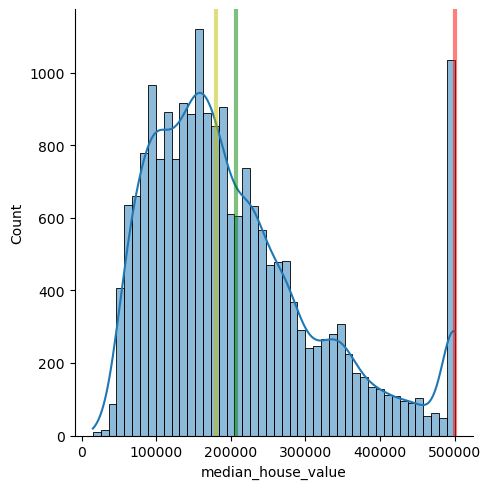

In [44]:
# plot distribution of median_house_value
sns.displot(x='median_house_value',data=df,kde=True)
plt.axvline(x=df.median_house_value.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.median_house_value.median(), linewidth=3, color='y', label="median", alpha=0.5)
plt.axvline(x=df.median_house_value.mode().values[0], linewidth=3, color='r', label="mode", alpha=0.5)
plt.show()

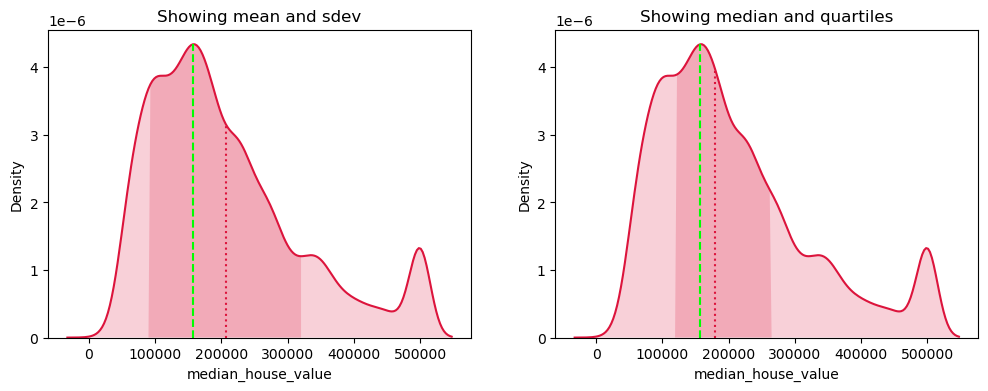

In [54]:
x = df.median_house_value
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax in axes:
    sns.kdeplot(x, shade=False, color='crimson', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        mode_idx = np.argmax(ys)
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and sdev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='crimson', ls=':')
    ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='lime', ls='--')
    ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='crimson', alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()

In [36]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

## We see that the median_house_value variable is right skewed, where the mean is to the right of the peak.

# Question 1
## Find a feature with missing values. How many missing values does it have?

In [7]:
x = df.isnull().sum().sort_values(ascending=False)
x

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Question 2
## What's the median (50% percentile) for variable 'population'?

In [8]:
df['population'].median()

1166.0

# Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [9]:
Features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [10]:
df = df[Features]
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [11]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [12]:
df.shape[0]

20640

In [13]:
df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Apply the log transformation to the median_house_value variable using the np.log1p() function.

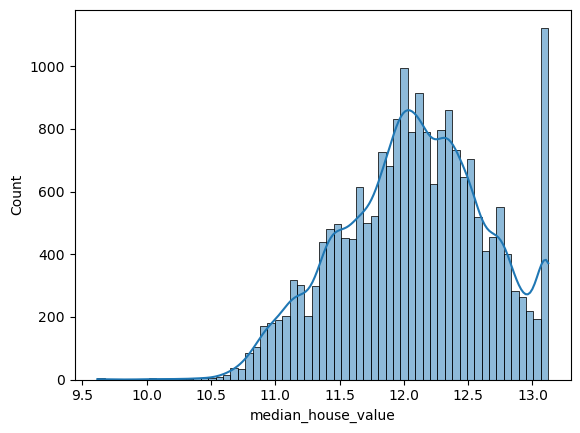

In [14]:
# plot distribution for log1p
sns.histplot(np.log1p(df.median_house_value), kde=True)
plt.show()

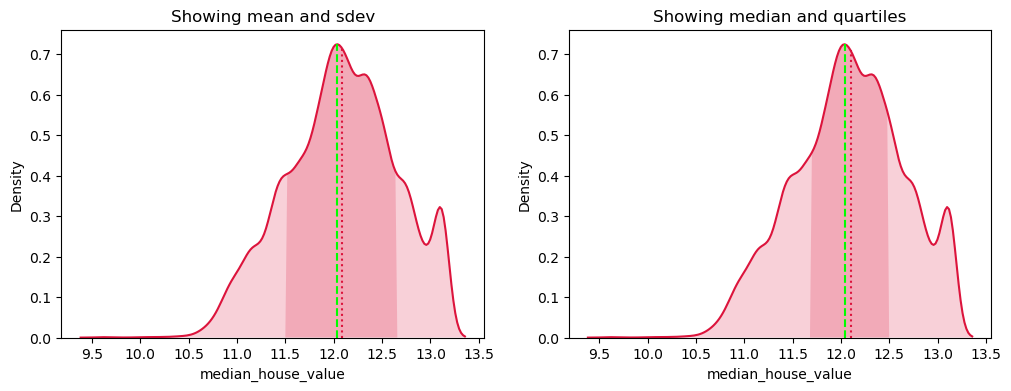

In [57]:
x = np.log1p(df.median_house_value)
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax in axes:
    sns.kdeplot(x, shade=False, color='crimson', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        mode_idx = np.argmax(ys)
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and sdev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='crimson', ls=':')
    ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='lime', ls='--')
    ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='crimson', alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()

In [59]:
np.log1p(df.median_house_value).describe()

count    20640.000000
mean        12.084891
std          0.569131
min          9.615805
25%         11.691916
50%         12.099050
75%         12.486451
max         13.122367
Name: median_house_value, dtype: float64

## We see that after we apply the log transformation, it is closer to a normal distribution.

# Split data

Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [15]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
SEED = 42
np.random.seed(SEED)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [16]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(n, (len(df_train)/n)*100, (len(df_val)/n)*100, (len(df_test)/n)*100)

20640 60.0 20.0 20.0


In [17]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [18]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0, with the mean or the median of this variable.
* Try all options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

# Train a linear regression model without regularization

In [19]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [20]:
ckeck = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

def prepare_X(df, fillna_value):
    df_num = df[ckeck]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [21]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Fill missing values with 0

In [22]:
# Fill NAs of training and validation partitions with 0 
X_null_train = prepare_X(df_train, fillna_value=0)
X_null_val = prepare_X(df_val, fillna_value=0)

# Train LR model 
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

# Obtain predictions 
y_null_pred_val = w_0_null + X_null_val.dot(w_null)


# RMSE
rmse_zero = round(rmse(y_val, y_null_pred_val),2)

# Fill missing values with mean

In [23]:
# Calculate mean 
mean = df_train.total_bedrooms.mean()

# Fill NAs of training and validation partitions with mean 
X_mean_train = prepare_X(df_train, fillna_value=mean)
X_mean_val = prepare_X(df_val, fillna_value=mean)

# Train LR model 
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

# Obtain predictions on the validation set 
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)


# RMSE
rmse_mean = round(rmse(y_val, y_mean_pred_val),2)

# Fill missing values with median

In [24]:
# Calculate mean 
median = df_train.total_bedrooms.median()

# Fill NAs of training and validation partitions with mean 
X_median_train = prepare_X(df_train, fillna_value=median)
X_median_val = prepare_X(df_val, fillna_value=median)

# Train LR model 
w_0_median, w_median = train_linear_regression(X_median_train, y_train)

# Obtain predictions on the validation set 
y_median_pred_val = w_0_median + X_median_val.dot(w_median)


# RMSE
rmse_median = round(rmse(y_val, y_median_pred_val),2)

In [25]:
# RMSE of both models 
print(f'RMSE LR model filled NAs with 0: {rmse_zero} \nRMSE LR model filled NAs with mean: {rmse_mean} \nRMSE LR model filled NAs with median: {rmse_median}')

RMSE LR model filled NAs with 0: 0.33 
RMSE LR model filled NAs with mean: 0.33 
RMSE LR model filled NAs with median: 0.33


# Regularization

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [26]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(f'r = {r}, RMSE = {rmse_val} , w_0 =  {w_0}')

r = 0, RMSE = 0.33 , w_0 =  -11.68697524132847
r = 1e-06, RMSE = 0.33 , w_0 =  -11.686959175450209
r = 0.0001, RMSE = 0.33 , w_0 =  -11.685368864762534
r = 0.001, RMSE = 0.33 , w_0 =  -11.67093131767582
r = 0.01, RMSE = 0.33 , w_0 =  -11.52849358524115
r = 0.1, RMSE = 0.33 , w_0 =  -10.274500281804324
r = 1, RMSE = 0.33 , w_0 =  -4.92048089764986
r = 5, RMSE = 0.34 , w_0 =  -1.4820957456372632
r = 10, RMSE = 0.34 , w_0 =  -0.7899311831436996


# Check seed values

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [28]:
rmse_list = []

for SEED in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    
    idx = np.arange(n)
    np.random.seed(SEED)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values
    
    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(f'r = {SEED}, RMSE = {rmse_val} , w_0 =  {w_0}')

r = 0, RMSE = 0.34 , w_0 =  -11.900382138009995
r = 1, RMSE = 0.34 , w_0 =  -11.732757373456781
r = 2, RMSE = 0.33 , w_0 =  -11.806729360745178
r = 3, RMSE = 0.34 , w_0 =  -11.587900347275358
r = 4, RMSE = 0.34 , w_0 =  -11.389470587570777
r = 5, RMSE = 0.34 , w_0 =  -11.447114275503033
r = 6, RMSE = 0.35 , w_0 =  -11.370516350653002
r = 7, RMSE = 0.34 , w_0 =  -12.473448918808291
r = 8, RMSE = 0.35 , w_0 =  -11.800287429154126
r = 9, RMSE = 0.34 , w_0 =  -11.459046830704626


In [29]:
np.asarray(rmse_list).shape

(10,)

In [30]:
std_rmse_results = np.round(np.std(rmse_list),3)

print(f'STD of RMSE scores: {std_rmse_results}')

STD of RMSE scores: 0.005


# Seed and Regularization

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Train a model with `r=0.001`.
* What's the RMSE on the test dataset?

In [31]:
    SEED = 9

    
    idx = np.arange(n)
    np.random.seed(SEED)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    frames = [df_train, df_val]
    df_train_val = pd.concat(frames)

    df_train_val = df_train_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    
    y_train_val_orig = df_train_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values
    
    y_train_val = np.log1p(y_train_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train_val['median_house_value']
    del df_test['median_house_value']

In [32]:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)


rmse_def = round(rmse(y_test, y_null_pred_test), 2)

print(f'RMSE on test: {rmse_def}')

RMSE on test: 0.35
